# Practical Work 2

- For this practical work, the trainees will develop a Python program that is able to implement the gradient descent in order to achieve the linear regression (Multivariables) of a set of datapoints.
- We will do a vectorize implementation (Using Matrix vectors operations) which is the more general and effecient form of GD implementation.
- As we did with the single variable we will do step by step implementation then combine all steps togeteher then make a function for the Multivariables LR training using GD.

### Import numpy, matplotlib.pyplot

In [23]:
import numpy as np
import matplotlib.pyplot as plt


### Read MultiVarLR.csv file into numpy array 

In [24]:
data = np.genfromtxt('MultiVarLR.csv',delimiter=',')

In [25]:
data

array([[ 73.,  80.,  75., 152.],
       [ 93.,  88.,  93., 185.],
       [ 89.,  91.,  90., 180.],
       [ 96.,  98., 100., 196.],
       [ 73.,  66.,  70., 142.],
       [ 53.,  46.,  55., 101.],
       [ 69.,  74.,  77., 149.],
       [ 47.,  56.,  60., 115.],
       [ 87.,  79.,  90., 175.],
       [ 79.,  70.,  88., 164.],
       [ 69.,  70.,  73., 141.],
       [ 70.,  65.,  74., 141.],
       [ 93.,  95.,  91., 184.],
       [ 79.,  80.,  73., 152.],
       [ 70.,  73.,  78., 148.],
       [ 93.,  89.,  96., 192.],
       [ 78.,  75.,  68., 147.],
       [ 81.,  90.,  93., 183.],
       [ 88.,  92.,  86., 177.],
       [ 78.,  83.,  77., 159.],
       [ 82.,  86.,  90., 177.],
       [ 86.,  82.,  89., 175.],
       [ 78.,  83.,  85., 175.],
       [ 76.,  83.,  71., 149.],
       [ 96.,  93.,  95., 192.]])

### Define variables X and y. 
### Assign all columns data except the last one to X and last column to y
<b>Notes:</b> 
- We have here 3 independent variables and one dependent variable.
- Make sure <b>y</b> is a column vector to obtain correct matrix vector operations.

In [26]:
x = data[:,0:3]
x

array([[ 73.,  80.,  75.],
       [ 93.,  88.,  93.],
       [ 89.,  91.,  90.],
       [ 96.,  98., 100.],
       [ 73.,  66.,  70.],
       [ 53.,  46.,  55.],
       [ 69.,  74.,  77.],
       [ 47.,  56.,  60.],
       [ 87.,  79.,  90.],
       [ 79.,  70.,  88.],
       [ 69.,  70.,  73.],
       [ 70.,  65.,  74.],
       [ 93.,  95.,  91.],
       [ 79.,  80.,  73.],
       [ 70.,  73.,  78.],
       [ 93.,  89.,  96.],
       [ 78.,  75.,  68.],
       [ 81.,  90.,  93.],
       [ 88.,  92.,  86.],
       [ 78.,  83.,  77.],
       [ 82.,  86.,  90.],
       [ 86.,  82.,  89.],
       [ 78.,  83.,  85.],
       [ 76.,  83.,  71.],
       [ 96.,  93.,  95.]])

In [27]:
y = data[:,3:4]
y

array([[152.],
       [185.],
       [180.],
       [196.],
       [142.],
       [101.],
       [149.],
       [115.],
       [175.],
       [164.],
       [141.],
       [141.],
       [184.],
       [152.],
       [148.],
       [192.],
       [147.],
       [183.],
       [177.],
       [159.],
       [177.],
       [175.],
       [175.],
       [149.],
       [192.]])

In [28]:
y = data[:,-1]
y

array([152., 185., 180., 196., 142., 101., 149., 115., 175., 164., 141.,
       141., 184., 152., 148., 192., 147., 183., 177., 159., 177., 175.,
       175., 149., 192.])

In [29]:
y= y.reshape(-1,1)
y

array([[152.],
       [185.],
       [180.],
       [196.],
       [142.],
       [101.],
       [149.],
       [115.],
       [175.],
       [164.],
       [141.],
       [141.],
       [184.],
       [152.],
       [148.],
       [192.],
       [147.],
       [183.],
       [177.],
       [159.],
       [177.],
       [175.],
       [175.],
       [149.],
       [192.]])

### Add column of ones to the X data matrix to be X0 variable for theta0 parameters.
- The model has X1,X2, and X3 variables and theta0, theta1, theta3, and theta4 parameters. So, we need X0 for theta0 to have consistent <b>X matrix</b> dimensions.

In [30]:
m = len (x)
X = np.hstack((np.ones((m, 1)), x))
X


array([[  1.,  73.,  80.,  75.],
       [  1.,  93.,  88.,  93.],
       [  1.,  89.,  91.,  90.],
       [  1.,  96.,  98., 100.],
       [  1.,  73.,  66.,  70.],
       [  1.,  53.,  46.,  55.],
       [  1.,  69.,  74.,  77.],
       [  1.,  47.,  56.,  60.],
       [  1.,  87.,  79.,  90.],
       [  1.,  79.,  70.,  88.],
       [  1.,  69.,  70.,  73.],
       [  1.,  70.,  65.,  74.],
       [  1.,  93.,  95.,  91.],
       [  1.,  79.,  80.,  73.],
       [  1.,  70.,  73.,  78.],
       [  1.,  93.,  89.,  96.],
       [  1.,  78.,  75.,  68.],
       [  1.,  81.,  90.,  93.],
       [  1.,  88.,  92.,  86.],
       [  1.,  78.,  83.,  77.],
       [  1.,  82.,  86.,  90.],
       [  1.,  86.,  82.,  89.],
       [  1.,  78.,  83.,  85.],
       [  1.,  76.,  83.,  71.],
       [  1.,  96.,  93.,  95.]])

### Step 1: Initialize model parameters as 4 by 1 column vector of zeros.

In [31]:
theta = np.zeros(4)
theta = theta.reshape(-1,1)
theta

array([[0.],
       [0.],
       [0.],
       [0.]])

### Step 2: Calculate model outpt y for all data points using matrix vector multiplication.
###  $$h(x) = X\theta$$

In [32]:
def hypothesis(X, theta):
    return X @ theta
hypothesis (X,theta)

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

### Step 3: Calculate the MSE Cost function.
- You should calculate the error vector first <b>e = h - y</b> then use it for cost function calculation.
- We will also need this error vector in gradient vector calculation.

In [33]:
def errors_v(X, y, theta):
    m = len(y)
    errors = hypothesis(X, theta) - y
    return errors
errors_v(X, y, theta)

array([[-152.],
       [-185.],
       [-180.],
       [-196.],
       [-142.],
       [-101.],
       [-149.],
       [-115.],
       [-175.],
       [-164.],
       [-141.],
       [-141.],
       [-184.],
       [-152.],
       [-148.],
       [-192.],
       [-147.],
       [-183.],
       [-177.],
       [-159.],
       [-177.],
       [-175.],
       [-175.],
       [-149.],
       [-192.]])

In [34]:
def compute_cost(X, y, theta):
    m = len(y)
    errors = hypothesis(X, theta) - y
    return (1 / (2 * m)) * np.sum(errors ** 2)
compute_cost(X, y, theta)

13405.98

### Step 4: Calculate the gradient vector
- In this step we will not calculate each gradient component for each parameter individually.
- We will use the error vector and calculate the gradient vector by multiplying the data matrix transpose with the error vector .
###  $$\nabla =\frac{X^Te}{m}$$

In [35]:
def compute_gradient(X, y, theta):
    m = len(y)
    errors = hypothesis(X, theta) - y
    gradient = (1 / m) * (X.T @ errors)
    return gradient

compute_gradient(X, y, theta)

array([[  -162.04],
       [-13075.8 ],
       [-13147.2 ],
       [-13467.08]])

### Step 5: Check if gradient norm < critical value (stop condition) e.g. 0.1

In [36]:

gradient_norm = np.linalg.norm(compute_gradient(X, y, theta))
print(f"gradient_norm: \n{gradient_norm}")

gradient_norm: 
22917.545989219703


### Step6: Update the parameters (use 0.00001 learning rate)

In [37]:
learning_rate = 0.00001
gradient = compute_gradient(X, y, theta)
theta -= learning_rate * gradient
theta

array([[0.0016204],
       [0.130758 ],
       [0.131472 ],
       [0.1346708]])

### Step 7: Combine all the previous steps and iterate untill you reach the critical value of the gradient norm or cost convergence check .
- learning rate = 0.00001.
- Maximum number of iterations = 10000.
- Stop condition grad_norm < 0.1.
- Cost convergence check <b>abs(cost[i] - cost[i-1]) < 0.001 </b>

### In order to plot the learning curves you need to save thetas and cost each iteration.

In [53]:
def gradient_descent(X, Y,learning_rate=0.00001, iterations=10000):
    m = len(Y)
    loss = []
    thetas=[]
    best_theta = np.zeros(X.shape[1]).reshape(-1,1)
    for i in range(iterations):
        h = X @ best_theta
        e = h - Y
        gv = (X.T @ e) / m 
        cost = (1 / (2 * m)) * np.sum(np.square(e))
        best_theta = best_theta - learning_rate * gv
        loss.append(cost)
        thetas.append(best_theta.flatten()) 
        
        gradient_norm = np.linalg.norm(gv)
        
        if gradient_norm < 0.1 or (i > 0 and abs(loss[i] - loss[i - 1]) < 0.001):
            iterations = i + 1
            break
    
    return best_theta, loss, thetas

In [44]:
theta

array([[0.0016204],
       [0.130758 ],
       [0.131472 ],
       [0.1346708]])

In [54]:


best_theta, loss, thetas=gradient_descent(X, y, learning_rate=0.00001, iterations=10000)

### Predict y values using the LR equation 
- Now we will use the obtained obtimum parameters <b>thetas</b> to make predition using the equation: 
###  $$h(x) = X\theta$$

In [55]:
hypothesis(X, best_theta)

array([[153.85241061],
       [185.01028885],
       [182.24038277],
       [198.53323443],
       [141.07459688],
       [104.11149894],
       [148.67140245],
       [110.30030663],
       [172.99991255],
       [160.3801951 ],
       [143.2039425 ],
       [141.26639087],
       [188.22004767],
       [156.3869114 ],
       [149.3754014 ],
       [187.79010852],
       [148.89467722],
       [178.43615319],
       [179.4169518 ],
       [160.53607446],
       [174.33307983],
       [173.61668889],
       [166.1878932 ],
       [154.98139191],
       [191.69890949]])

### Use R Squared metrics to evaluate LR equation output
- Can be found in <b>sklearn.metrics</b>

https://www.youtube.com/watch?v=KccCy0hu-dM

In [56]:
from sklearn.metrics import r2_score

In [57]:
predictions = hypothesis(X, best_theta)
r2 = r2_score(y, predictions)
print(f"R-squared: {r2}")

R-squared: 0.9797139587891305


### Plot loss vs. iterations

In [66]:
def plot_loss(loss):
    plt.plot(loss, linestyle='-', marker='*')
    plt.title("Loss Over Iterations")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()


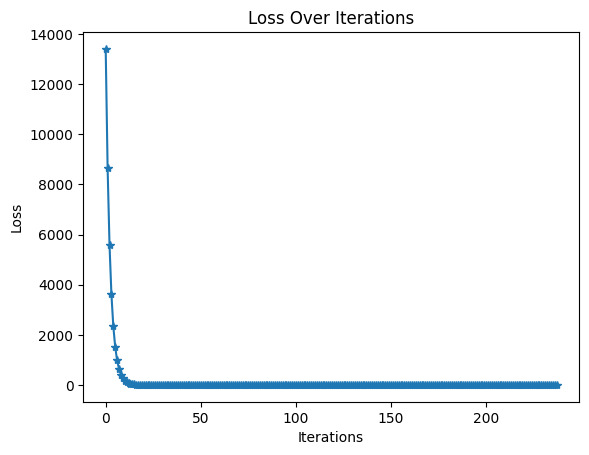

In [67]:
plot_loss(loss)

### Plot loss vs. each theta

In [63]:
def plot_thetas_loss(thetas, loss):
    theta_0 = [t[0] for t in thetas]
    theta_1 = [t[1] for t in thetas]
    theta_2 = [t[2] for t in thetas]
    theta_3 = [t[3] for t in thetas]
    
    fig, axes = plt.subplots(2, 2, figsize=(10, 8))
    
    axes[0, 0].plot(theta_0, loss, marker="o")
    axes[0, 0].set_title("Theta 0 vs Loss")
    
    axes[0, 1].plot(theta_1, loss, marker="o")
    axes[0, 1].set_title("Theta 1 vs Loss")
    
    axes[1, 0].plot(theta_2, loss, marker="o")
    axes[1, 0].set_title("Theta 2 vs Loss")
    
    axes[1, 1].plot(theta_3, loss, marker="o")
    axes[1, 1].set_title("Theta 3 vs Loss")
    
    plt.tight_layout()
    plt.show()

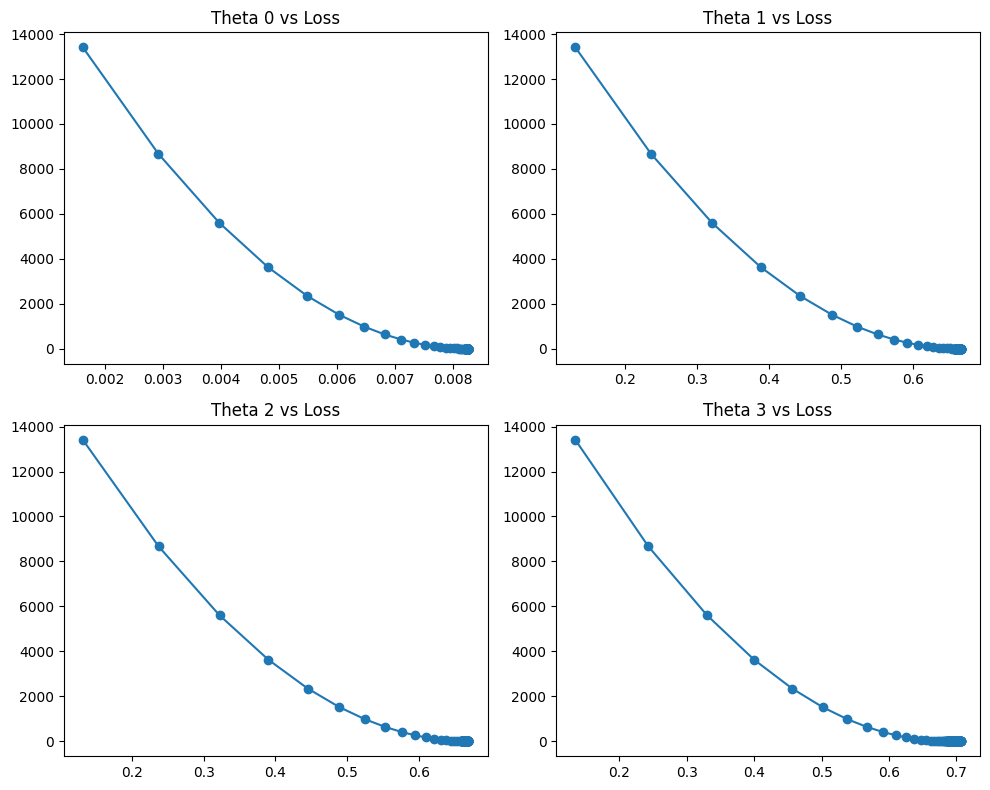

In [64]:
plot_thetas_loss(thetas, loss)

- Use <b>learning rate = 0.0001</b> and see the difference in learning curves and <b>r2_score</b>.
- You can also try larger learning rate i.e. <b>0.001</b> and see how the optimizer diverges and <b>r2_score</b>.

Testing learning rate: 0.0001
Final R² Score: 0.9879345951629844



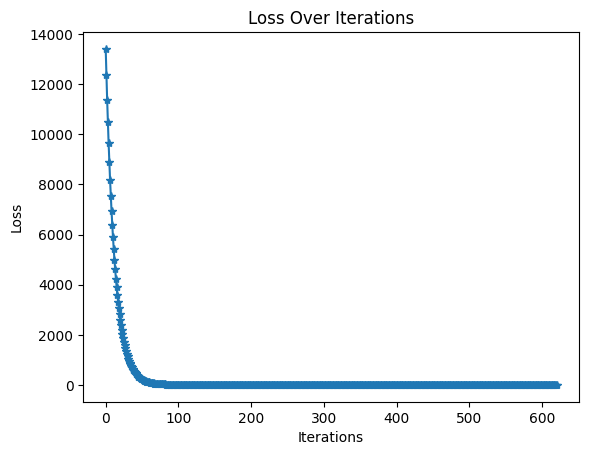

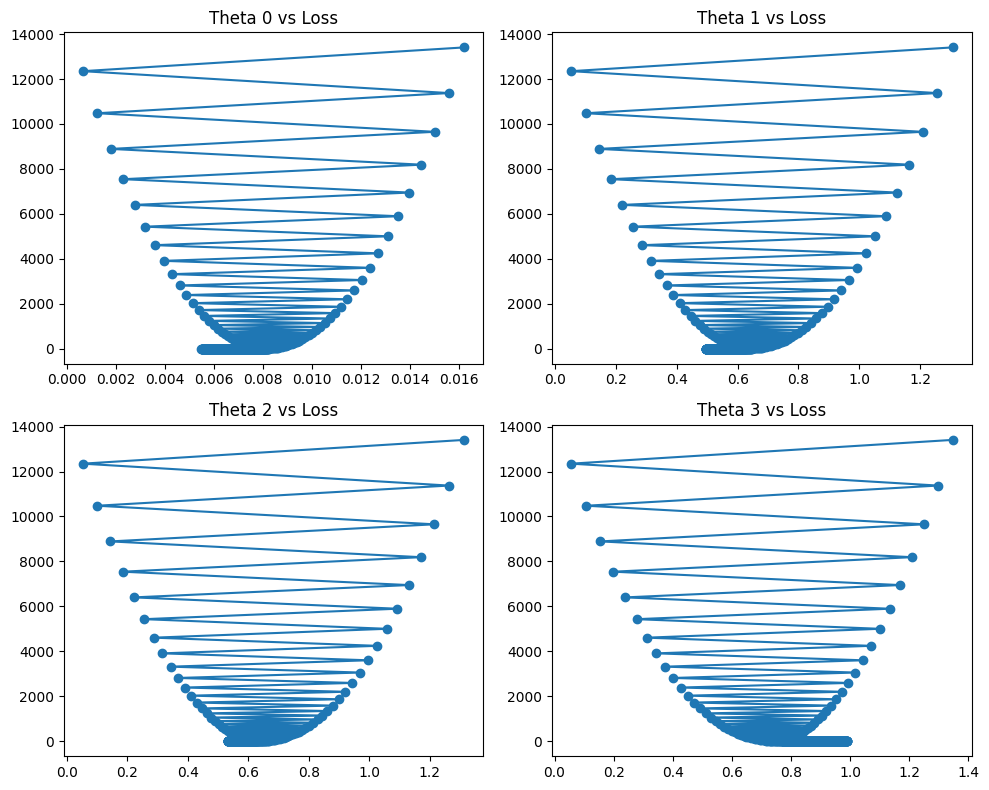

In [70]:
learning_rates = 0.0001
print(f"Testing learning rate: {learning_rates}")
best_theta, loss, thetas = gradient_descent(X, y, learning_rate=learning_rates)
r2 = r2_score(y, X @ best_theta)
print(f"Final R² Score: {r2}\n")
plot_loss(loss)
plot_thetas_loss(thetas, loss)


In [73]:
learning_rates = 0.001
print(f"Testing learning rate: {learning_rates}")
best_theta, loss, thetas = gradient_descent(X, y, learning_rate=learning_rates)
r2 = r2_score(y, X @ best_theta)
print(f"Final R² Score: {r2}\n")


Testing learning rate: 0.001


C:\Users\YOUSSEF\AppData\Local\Temp\ipykernel_21104\1454049413.py:10: RuntimeWarning: overflow encountered in square
  cost = (1 / (2 * m)) * np.sum(np.square(e))
C:\Users\YOUSSEF\AppData\Local\Temp\ipykernel_21104\1454049413.py:17: RuntimeWarning: invalid value encountered in scalar subtract
  if gradient_norm < 0.1 or (i > 0 and abs(loss[i] - loss[i - 1]) < 0.001):
C:\Users\YOUSSEF\AppData\Local\Temp\ipykernel_21104\1454049413.py:9: RuntimeWarning: overflow encountered in matmul
  gv = (X.T @ e) / m
C:\Users\YOUSSEF\AppData\Local\Temp\ipykernel_21104\1454049413.py:11: RuntimeWarning: invalid value encountered in subtract
  best_theta = best_theta - learning_rate * gv


ValueError: Input contains NaN.

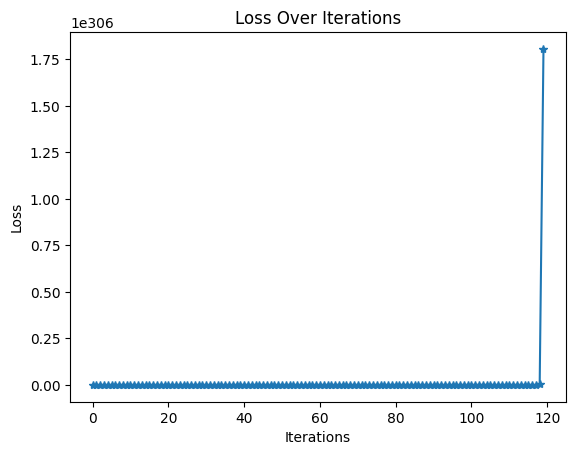

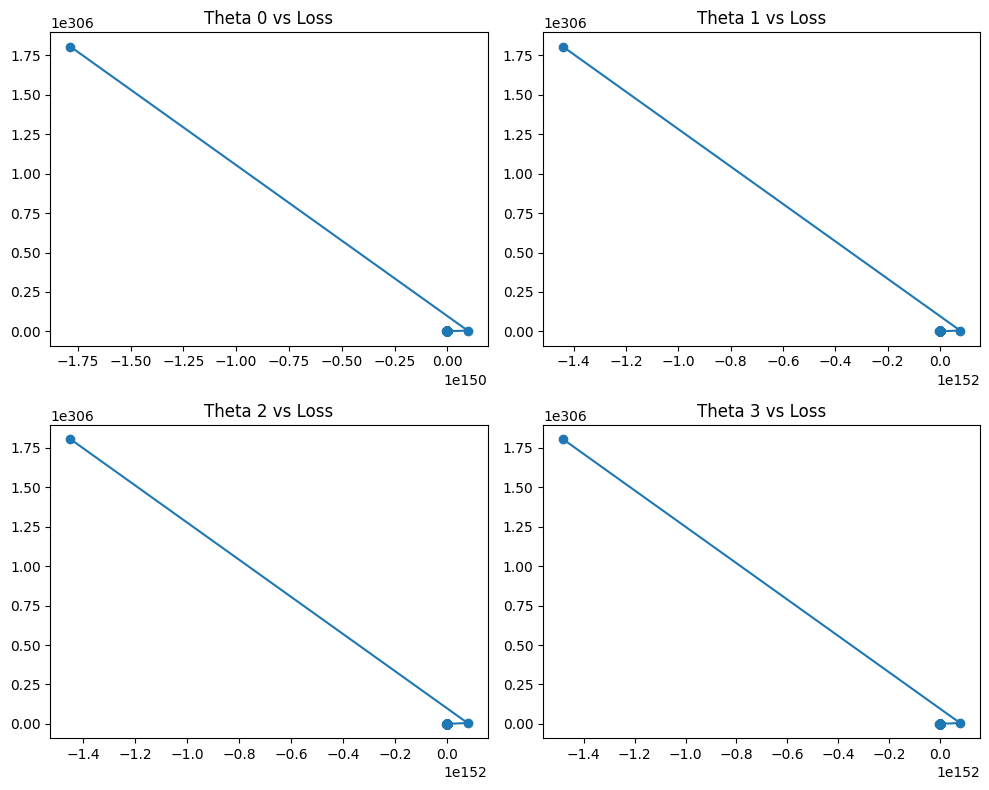

In [74]:
plot_loss(loss)
plot_thetas_loss(thetas, loss)


## Optional Part: Make all as funtions:
### You can modify the implementation to be a function taking all hyperparameters and return all needed outputs.
### You can also make your plotting using functions taking the outputs and return the learning curves.
### This will make your life easy when you want to try different values of hyperparametrs.

#### Use your previous code and create a function to perform GD for Muli-variable linear regression.
#### The function should take the following input parameters:
##### Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations, stop conditions values.
#### The function should return the following:
##### All Theta values till converge, and equivellant Losses.

In [77]:
learning_rates = 0.00001
print(f"Testing learning rate: {learning_rates}")
best_theta, loss, thetas = gradient_descent(X, y, learning_rate=learning_rates)
r2 = r2_score(y, X @ best_theta)
print(f"Final R² Score: {r2}\n")



Testing learning rate: 1e-05
Final R² Score: 0.9797139587891305



r squared: 0.9797103568402049


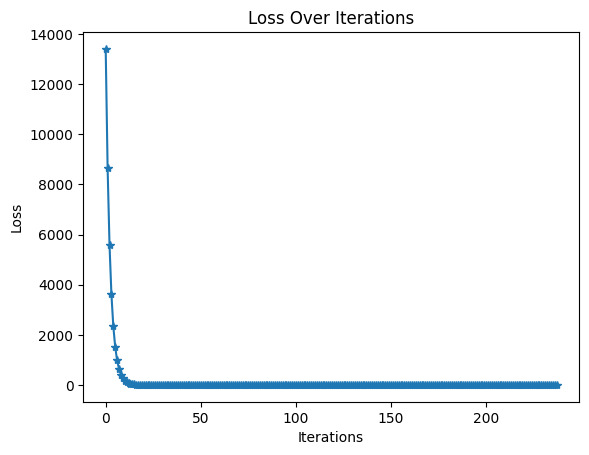

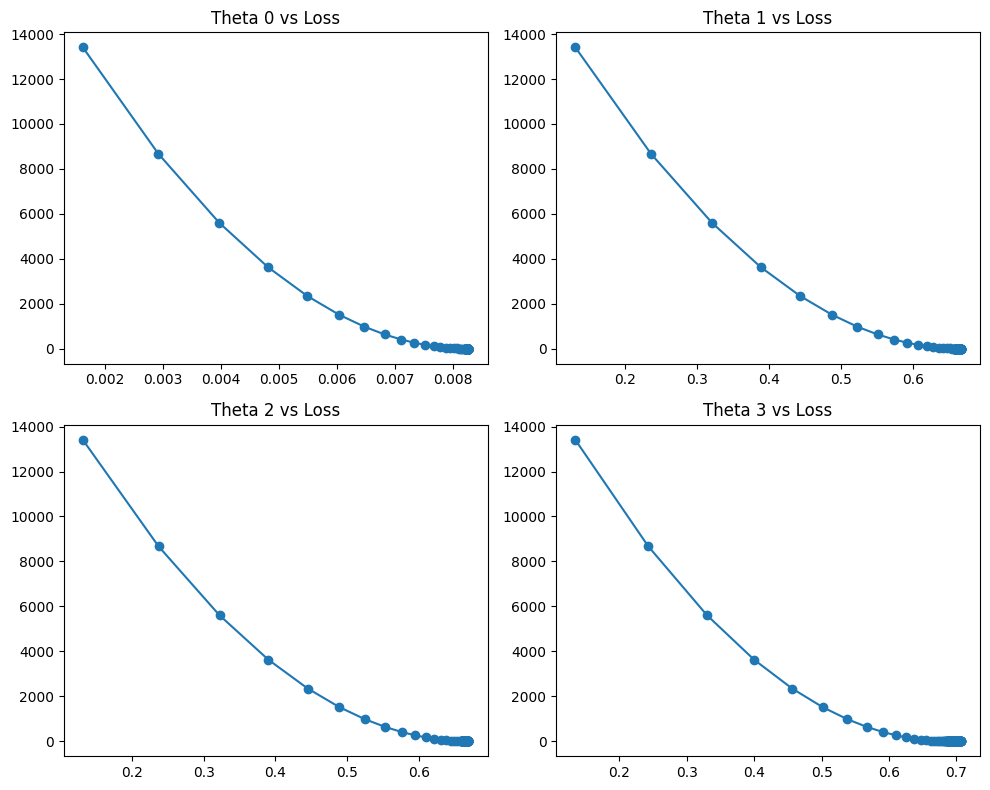

In [78]:
plot_loss(loss)
plot_thetas_loss(thetas, loss)

Testing learning rate: 5e-05
Final R² Score: 0.9869631891053096



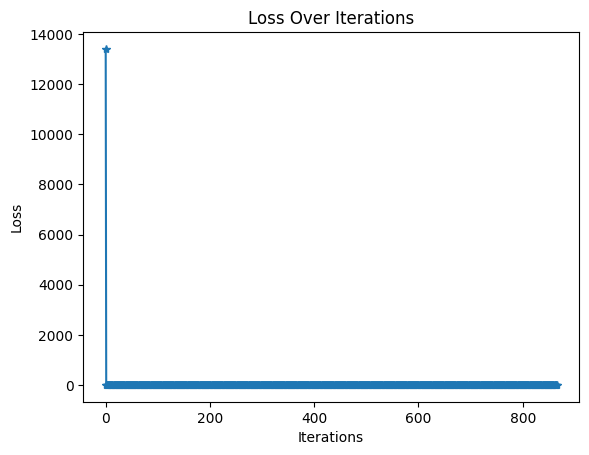

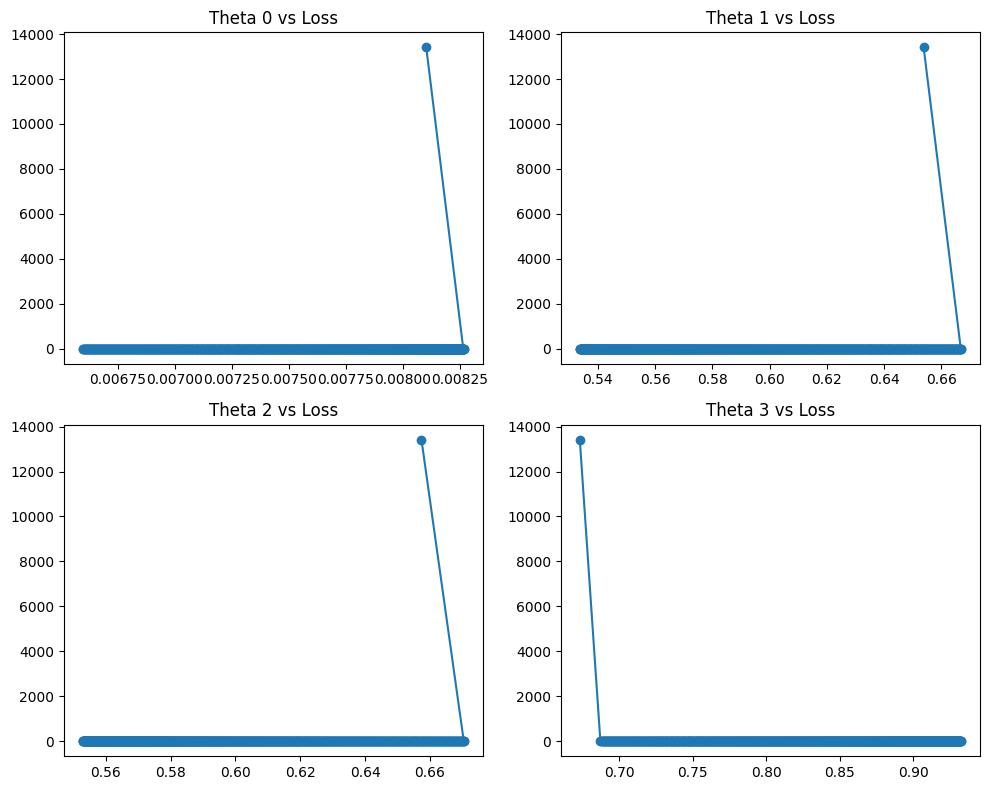

In [79]:
learning_rates = 0.00005
print(f"Testing learning rate: {learning_rates}")
best_theta, loss, thetas = gradient_descent(X, y, learning_rate=learning_rates)
r2 = r2_score(y, X @ best_theta)
print(f"Final R² Score: {r2}\n")
plot_loss(loss)
plot_thetas_loss(thetas, loss)

In [80]:
learning_rates = 0.0005
print(f"Testing learning rate: {learning_rates}")
best_theta, loss, thetas = gradient_descent(X, y, learning_rate=learning_rates)
r2 = r2_score(y, X @ best_theta)
print(f"Final R² Score: {r2}\n")
plot_loss(loss)
plot_thetas_loss(thetas, loss)

Testing learning rate: 0.0005


C:\Users\YOUSSEF\AppData\Local\Temp\ipykernel_21104\1454049413.py:10: RuntimeWarning: overflow encountered in square
  cost = (1 / (2 * m)) * np.sum(np.square(e))
C:\Users\YOUSSEF\AppData\Local\Temp\ipykernel_21104\1454049413.py:17: RuntimeWarning: invalid value encountered in scalar subtract
  if gradient_norm < 0.1 or (i > 0 and abs(loss[i] - loss[i - 1]) < 0.001):
C:\Users\YOUSSEF\AppData\Local\Temp\ipykernel_21104\1454049413.py:9: RuntimeWarning: overflow encountered in matmul
  gv = (X.T @ e) / m
C:\Users\YOUSSEF\AppData\Local\Temp\ipykernel_21104\1454049413.py:11: RuntimeWarning: invalid value encountered in subtract
  best_theta = best_theta - learning_rate * gv


ValueError: Input contains NaN.

Testing learning rate: 5e-06
Final R² Score: 0.9789624206946833



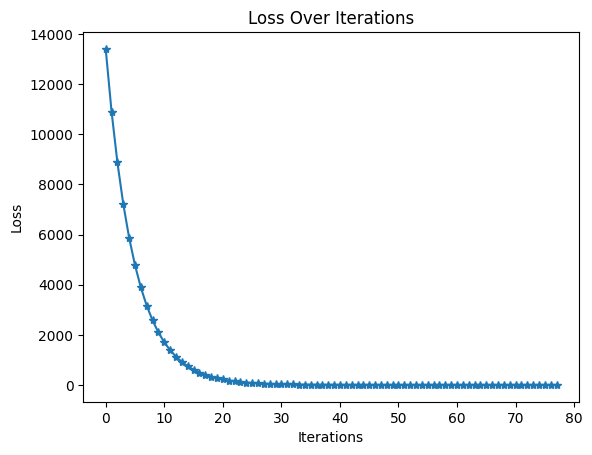

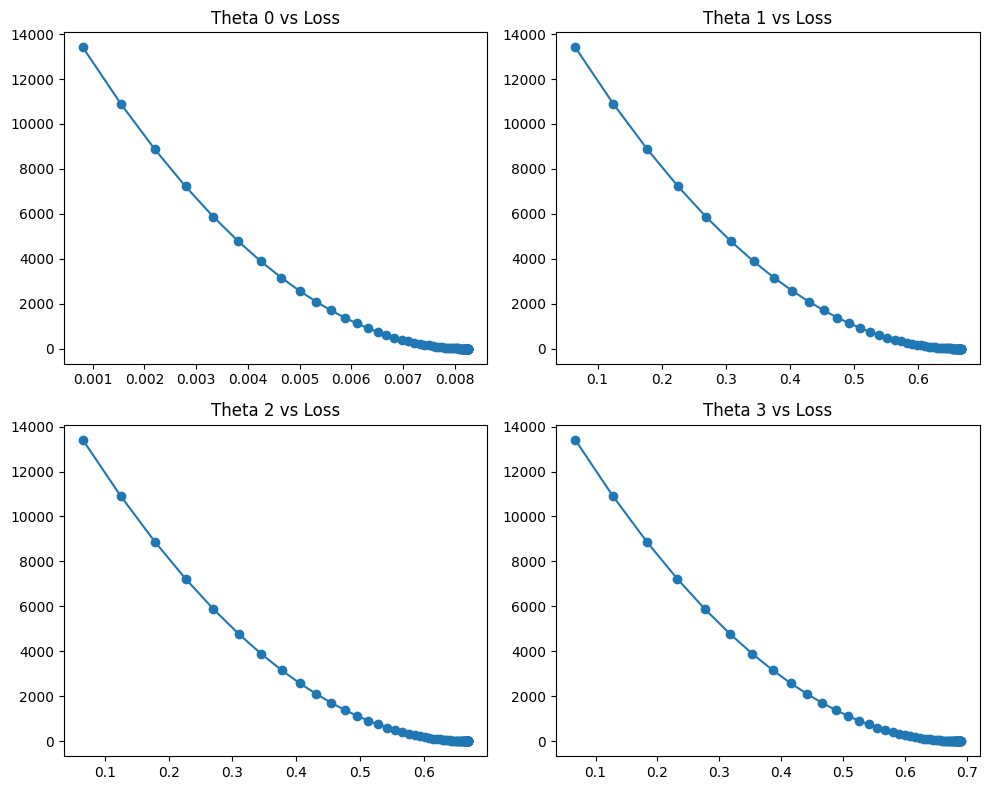

In [81]:
learning_rates = 0.000005
print(f"Testing learning rate: {learning_rates}")
best_theta, loss, thetas = gradient_descent(X, y, learning_rate=learning_rates)
r2 = r2_score(y, X @ best_theta)
print(f"Final R² Score: {r2}\n")
plot_loss(loss)
plot_thetas_loss(thetas, loss)

Testing learning rate: 1e-07
Final R² Score: 0.9780205594629952



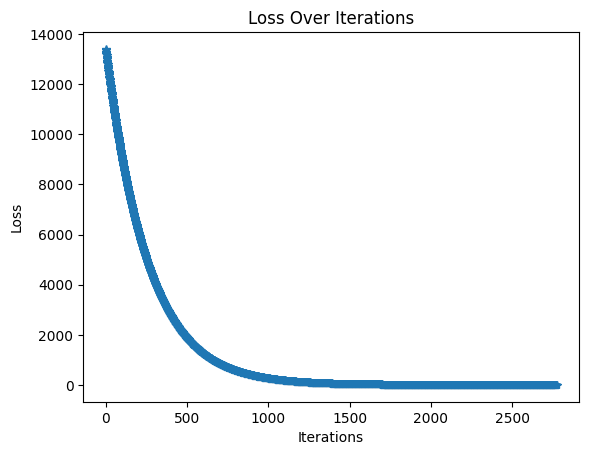

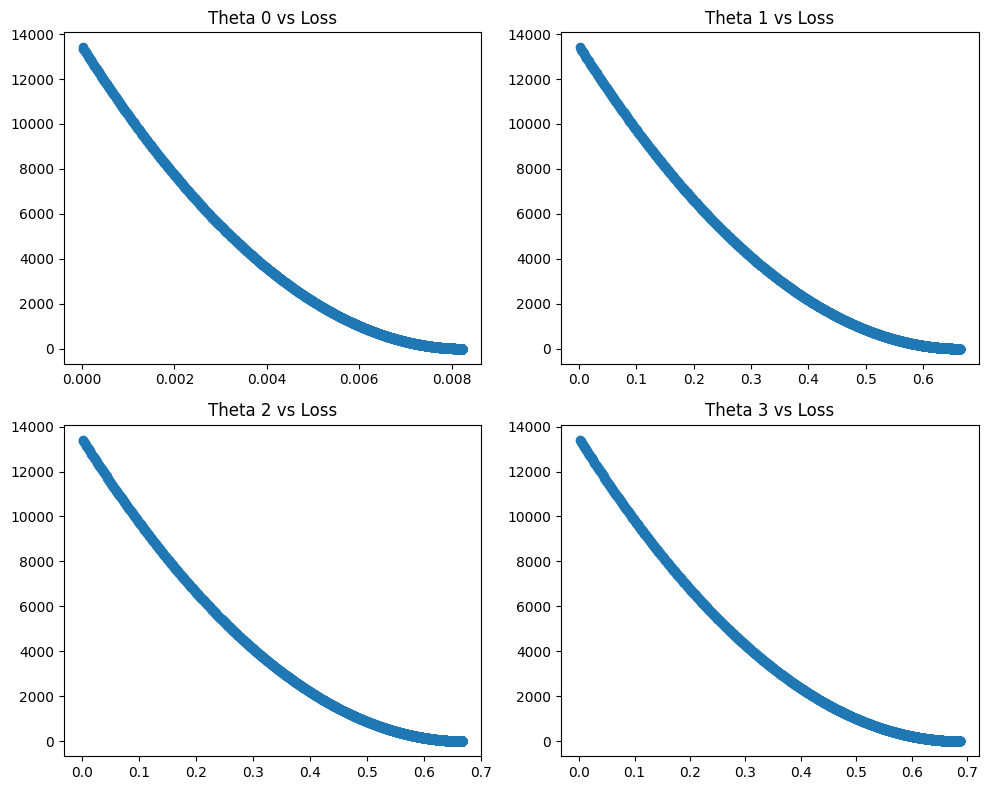

In [82]:
learning_rates = 0.0000001
print(f"Testing learning rate: {learning_rates}")
best_theta, loss, thetas = gradient_descent(X, y, learning_rate=learning_rates)
r2 = r2_score(y, X @ best_theta)
print(f"Final R² Score: {r2}\n")
plot_loss(loss)
plot_thetas_loss(thetas, loss)

In [83]:
learning_rates = 0.001
print(f"Testing learning rate: {learning_rates}")
best_theta, loss, thetas = gradient_descent(X, y, learning_rate=learning_rates)
r2 = r2_score(y, X @ best_theta)
print(f"Final R² Score: {r2}\n")
plot_loss(loss)
plot_thetas_loss(thetas, loss)

Testing learning rate: 0.001


C:\Users\YOUSSEF\AppData\Local\Temp\ipykernel_21104\1454049413.py:10: RuntimeWarning: overflow encountered in square
  cost = (1 / (2 * m)) * np.sum(np.square(e))
C:\Users\YOUSSEF\AppData\Local\Temp\ipykernel_21104\1454049413.py:17: RuntimeWarning: invalid value encountered in scalar subtract
  if gradient_norm < 0.1 or (i > 0 and abs(loss[i] - loss[i - 1]) < 0.001):
C:\Users\YOUSSEF\AppData\Local\Temp\ipykernel_21104\1454049413.py:9: RuntimeWarning: overflow encountered in matmul
  gv = (X.T @ e) / m
C:\Users\YOUSSEF\AppData\Local\Temp\ipykernel_21104\1454049413.py:11: RuntimeWarning: invalid value encountered in subtract
  best_theta = best_theta - learning_rate * gv


ValueError: Input contains NaN.

In [84]:
learning_rates = 0.005
print(f"Testing learning rate: {learning_rates}")
best_theta, loss, thetas = gradient_descent(X, y, learning_rate=learning_rates)
r2 = r2_score(y, X @ best_theta)
print(f"Final R² Score: {r2}\n")
plot_loss(loss)
plot_thetas_loss(thetas, loss)

Testing learning rate: 0.005


C:\Users\YOUSSEF\AppData\Local\Temp\ipykernel_21104\1454049413.py:10: RuntimeWarning: overflow encountered in square
  cost = (1 / (2 * m)) * np.sum(np.square(e))
C:\Users\YOUSSEF\AppData\Local\Temp\ipykernel_21104\1454049413.py:17: RuntimeWarning: invalid value encountered in scalar subtract
  if gradient_norm < 0.1 or (i > 0 and abs(loss[i] - loss[i - 1]) < 0.001):
C:\Users\YOUSSEF\AppData\Local\Temp\ipykernel_21104\1454049413.py:9: RuntimeWarning: overflow encountered in matmul
  gv = (X.T @ e) / m
C:\Users\YOUSSEF\AppData\Local\Temp\ipykernel_21104\1454049413.py:11: RuntimeWarning: invalid value encountered in subtract
  best_theta = best_theta - learning_rate * gv


ValueError: Input contains NaN.

Testing learning rate: 0.0001
Final R² Score: 0.9879345951629844



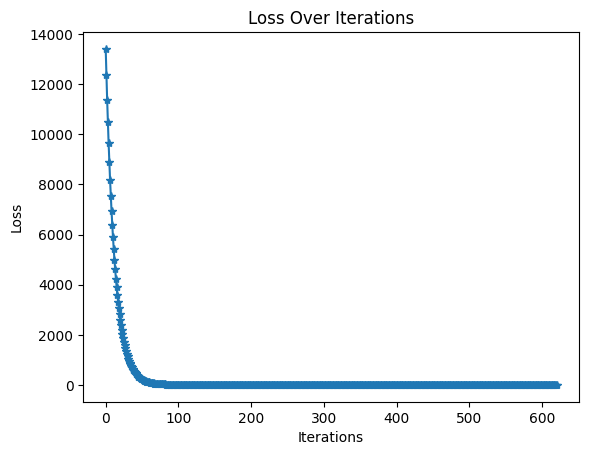

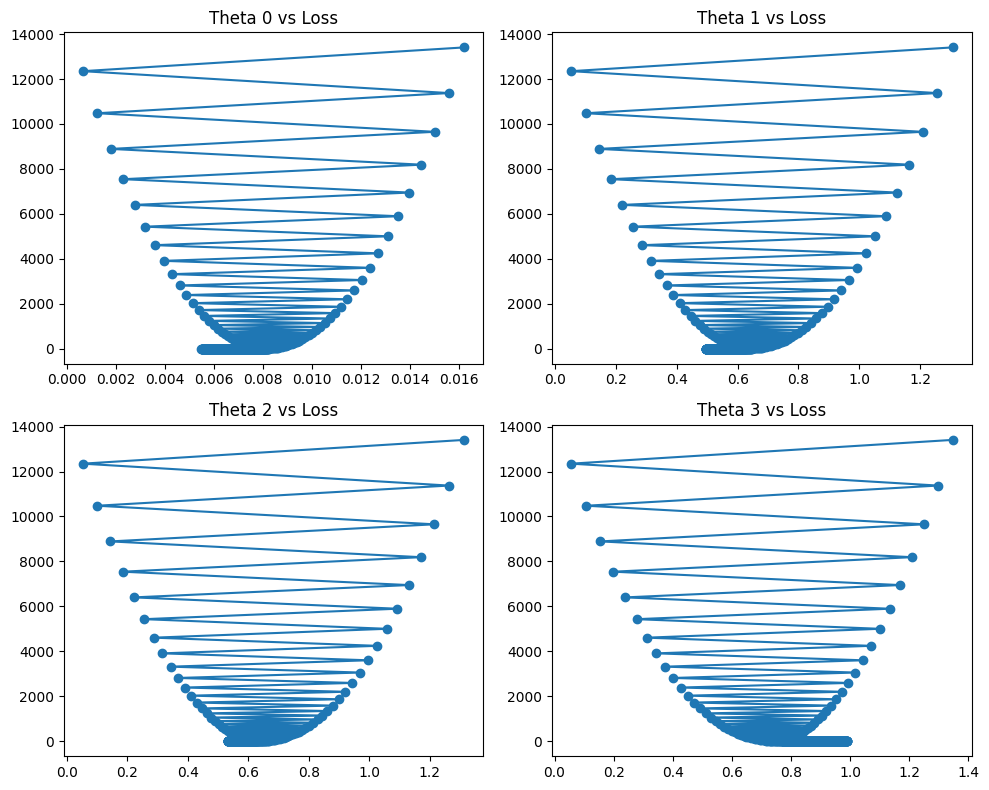

In [85]:
learning_rates = 0.0001
print(f"Testing learning rate: {learning_rates}")
best_theta, loss, thetas = gradient_descent(X, y, learning_rate=learning_rates)
r2 = r2_score(y, X @ best_theta)
print(f"Final R² Score: {r2}\n")
plot_loss(loss)
plot_thetas_loss(thetas, loss)

In [86]:
learning_rates = 0.0005
print(f"Testing learning rate: {learning_rates}")
best_theta, loss, thetas = gradient_descent(X, y, learning_rate=learning_rates)
r2 = r2_score(y, X @ best_theta)
print(f"Final R² Score: {r2}\n")
plot_loss(loss)
plot_thetas_loss(thetas, loss)

Testing learning rate: 0.0005


C:\Users\YOUSSEF\AppData\Local\Temp\ipykernel_21104\1454049413.py:10: RuntimeWarning: overflow encountered in square
  cost = (1 / (2 * m)) * np.sum(np.square(e))
C:\Users\YOUSSEF\AppData\Local\Temp\ipykernel_21104\1454049413.py:17: RuntimeWarning: invalid value encountered in scalar subtract
  if gradient_norm < 0.1 or (i > 0 and abs(loss[i] - loss[i - 1]) < 0.001):
C:\Users\YOUSSEF\AppData\Local\Temp\ipykernel_21104\1454049413.py:9: RuntimeWarning: overflow encountered in matmul
  gv = (X.T @ e) / m
C:\Users\YOUSSEF\AppData\Local\Temp\ipykernel_21104\1454049413.py:11: RuntimeWarning: invalid value encountered in subtract
  best_theta = best_theta - learning_rate * gv


ValueError: Input contains NaN.

Testing learning rate: 8e-05
Final R² Score: 0.9876896409956676



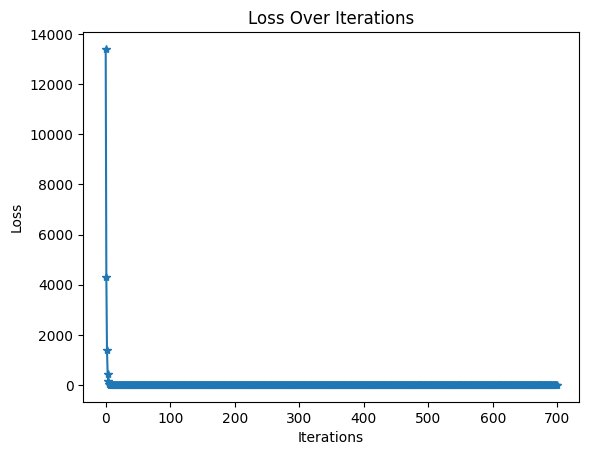

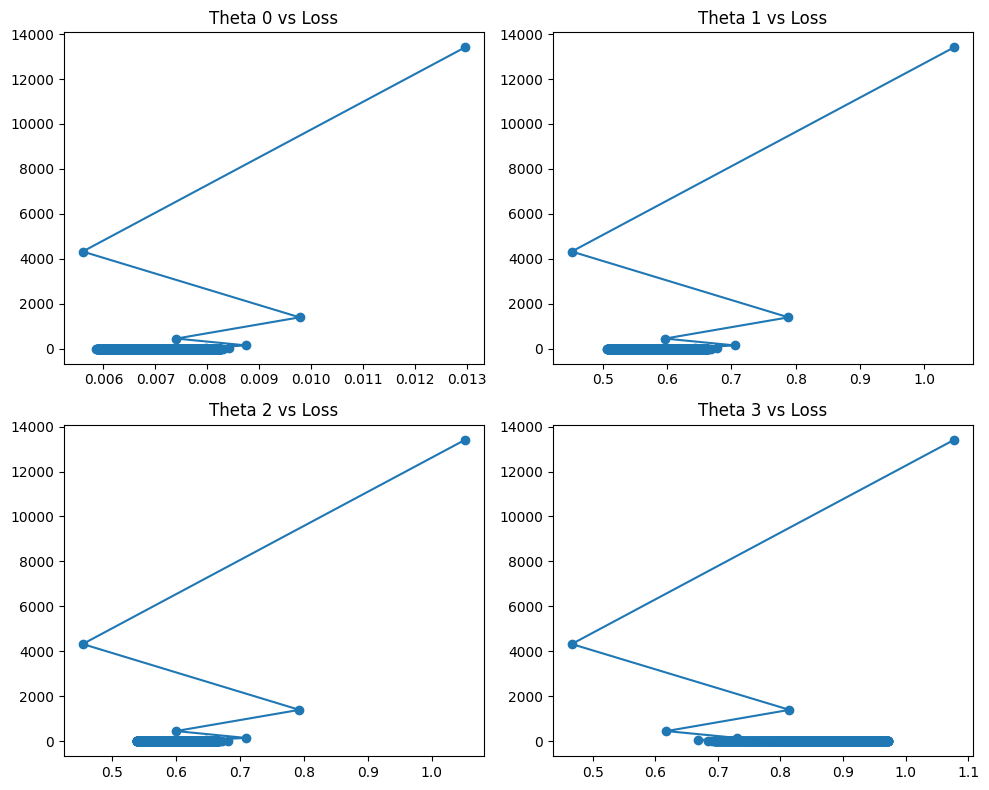

In [87]:
learning_rates = 0.00008
print(f"Testing learning rate: {learning_rates}")
best_theta, loss, thetas = gradient_descent(X, y, learning_rate=learning_rates)
r2 = r2_score(y, X @ best_theta)
print(f"Final R² Score: {r2}\n")
plot_loss(loss)
plot_thetas_loss(thetas, loss)